# Comunicaciones Digitales
### Sofía Amallo - 41279731

Consigna: Realizar un sistema de comunicación con modulación QPSK y 8PSK, filtros TX y RX raiz de coseno realzados y canal AWGN. 

Parámetros de desempeño a mostrar son: diagrama ojo y diagrama de constelación. 

Parámetros a emplear son: span del filtro, muestras por símbolos (SPS), SNRdB

![diagramadebloque](https://github.com/sofia-am/comunicaciones-digitales/blob/master/img/urn%20cambridge.org%20id%20binary%2020170621045003030-0413%209781316335444%2011473fig1_1.png?raw=true)


## Phase Shift Keying:
La modulación por desplazamiento de fase ( PSK ) es un proceso de modulación digital que transmite datos cambiando (modulando) la fase de una señal de referencia de frecuencia constante (la onda portadora ). La modulación se logra variando las entradas de seno y coseno en un momento preciso. [1]

### QPSK (Quadrature Phase-Shift Keying)
En QPSK se usan dos bits para formar cada símbolo. La salida del modulador es la portadora con una fase de entre cuatro posibles valores durante el tiempo de duración de símbolo

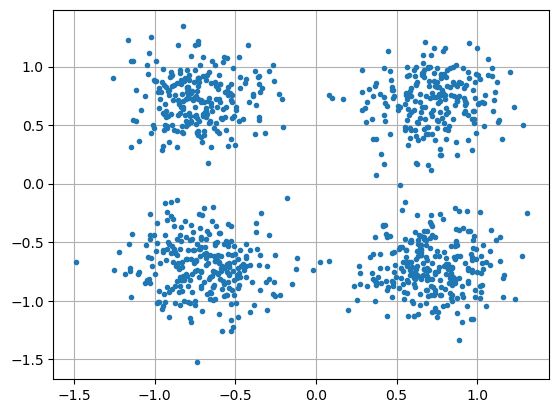

In [8]:
import numpy as np
import matplotlib.pyplot as plt

cant_simbolos = 1000

data_array = np.random.randint(0, 4, cant_simbolos) #genero un array de valores aleatorios entre 0 y 3
data_grados = data_array*360/4.0 + 45 # 45, 135 255, 315 grados
data_radianes = data_grados*np.pi/180.0
data_simbolos = np.cos(data_radianes) + 1j*np.sin(data_radianes)

ruido = (np.random.randn(cant_simbolos) + 1j*np.random.randn(cant_simbolos))/np.sqrt(2) #randn me devuelve un conjunto de datos con distribución normal
potencia_ruido = 0.1

r = data_simbolos + ruido*np.sqrt(potencia_ruido)

plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n = (np.random.randn(cant_simbolos) + 1j*np.random.randn(cant_simbolos))/np.sqrt(2)

print(np.var(n))

0.9798137140107065
